
# Predicting Customer Churn: Identifying Customers Susceptible to Churn

### Overview
This project aims to develop a machine learning model to predict customer churn for Reder Telecom. By leveraging customer data such as demographics, engagement, and feedback, we can identify which customers are likely to churn and take proactive actions to retain them.


##  Rationale for the Project
Customer churn has become a significant challenge for telecom companies, including Reder Telecom. Churn refers to when customers stop using a service, and it is essential to predict which customers are at risk of churning to implement effective retention strategies. Understanding churn can help reduce operational costs, improve customer satisfaction, and increase profitability.


##  Aim of the Project
The primary goal of this project is to:
- Build a machine learning model to predict customer churn.
- Identify the key drivers of churn by analyzing customer behavior and attributes.


##  Data Description

###  Dataset Overview
The dataset used in this project contains both categorical and numerical features, capturing customer demographics, behavior, service interactions, and their relationship with the telecom service. This rich dataset provides insights that help predict customer churn.


| Feature                   | Description                                                                                 | Data Type   | Example Values            |
|---------------------------|---------------------------------------------------------------------------------------------|-------------|---------------------------|
| **Customer ID**            | Unique identifier for each customer.                                                        | Categorical | C001, C002                |
| **Name**                   | Name of the customer.                                                                       | Categorical | John Doe, Jane Smith       |
| **Age**                    | Age of the customer.                                                                        | Numerical   | 25, 45                    |
| **Gender**                 | Gender of the customer.                                                                     | Categorical | Male, Female              |
| **Location**               | The city or region where the customer is based.                                             | Categorical | New York, London          |
| **Email**                  | Customer's email address for communication.                                                 | Categorical | john@example.com          |
| **Phone**                  | Customer's phone number.                                                                    | Categorical | +1234567890               |
| **Address**                | The physical postal address of the customer.                                                | Categorical | 123 Main St, NY           |
| **Segment**                | Customer segment (e.g., premium, regular) based on their behavior and purchases.            | Categorical | Segment A, Segment B      |
| **Purchase History**        | A record of customer purchases, including product names, purchase frequency, and value.     | Structured  | [{Product A, 3, $100}, ...]|
| **Service Interactions**   | The history of the customer's interactions with customer service (e.g., calls, chats).       | Structured  | [{Call, Complaint}, ...]  |
| **Payment History**        | A record of the customer’s payment method, amount, and any issues with payments.            | Structured  | [{Credit Card, $50}, ...] |
| **Website Usage**          | Data on the customer’s engagement with the company’s website (e.g., page views, time spent). | Structured  | {100 views, 45 minutes}   |
| **Clickstream Data**       | A record of customer interactions with the website, including clicks, searches, and actions.| Structured  | [{Search, Product A, ...}]|
| **Engagement Metrics**     | Metrics like number of logins and frequency of interaction (e.g., daily, weekly, monthly).   | Structured  | {10 logins, Weekly}       |
| **Feedback**               | Customer feedback, including ratings (1-5) and any comments provided.                       | Categorical | 5 (Excellent), Great Service |
| **Marketing Communication**| Record of marketing emails sent, opened, and clicked by the customer.                       | Structured  | [{Sent, Opened, Clicked}] |
| **NPS (Net Promoter Score)**| A score between 0-10 reflecting customer satisfaction and loyalty.                          | Numerical   | 7, 9                      |
| **Churn Label**            | Binary label indicating if the customer churned (1 = Yes, 0 = No).                          | Categorical | 0, 1                      |
| **Timestamp**              | The date and time when the data was recorded.                                               | Datetime    | 2024-09-14 12:34:56       |






##  Tech Stack
The project utilizes the following tools and libraries:
- **Python**: Primary programming language.
- **Pandas**: Data manipulation and analysis.
- **NumPy**: Numerical operations.
- **Matplotlib & Seaborn**: Data visualization.
- **Scikit-learn**: Machine learning model building.





In [35]:
## Import Neccesary Libraries
from ast import literal_eval
import pandas as pd
import numpy as np  # Changed py to np for consistency with numpy
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')


## Data Collection

In [2]:
###Loading the dataset
df = pd.read_excel('Dataset.xlsx')

### Data Exploration

In Data Exploration, we will be looking at:
- Understanding the data structure, Statistics, quality of the dataset
- Visualizing the data to gain insights
- Checking for missing vlues

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [4]:
### Checking For Missing values
df.isnull().sum()

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [5]:
### Check for duplicates
df.duplicated().any()

False

#### Get a Statiscal Overview of numerical columns in the datasets

In [6]:
starts_overview = df.describe()
starts_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


###### Next, we see how target variable 'ChurnLabel', and some of other variables are distributed.

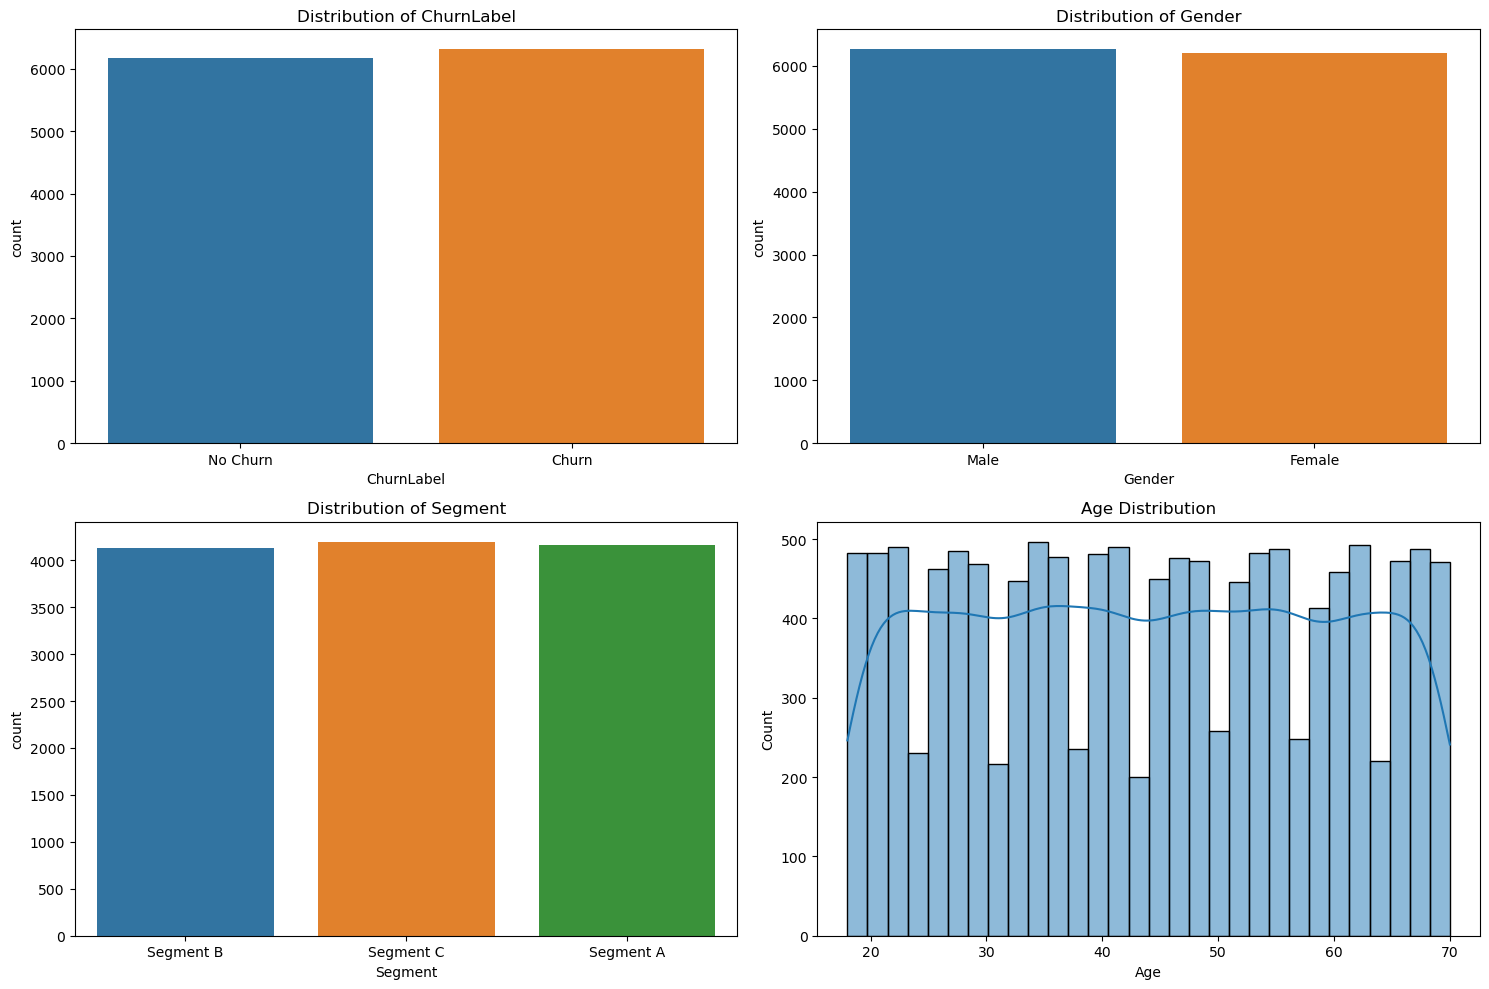

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plot the distribution of the target variable ChurnLabel
sns.countplot(x="ChurnLabel", data=df, ax=ax[0,0])
ax[0,0].set_title('Distribution of ChurnLabel')
ax[0,0].set_xticklabels(['No Churn', 'Churn'])

# plot distribution of Gender
sns.countplot(x="Gender", data=df, ax=ax[0,1])
ax[0,1].set_title('Distribution of Gender')

# plot distribution of Segment
sns.countplot(x="Segment", data=df, ax=ax[1,0])
ax[1,0].set_title('Distribution of Segment')

# plot distribution of Age
sns.histplot(df['Age'], bins=30, ax=ax[1,1], kde=True)
ax[1,1].set_title('Age Distribution')

plt.tight_layout()
plt.show()


Correlation Analysis: Which columns in the dataset corelates with the 'Churnlabel' column

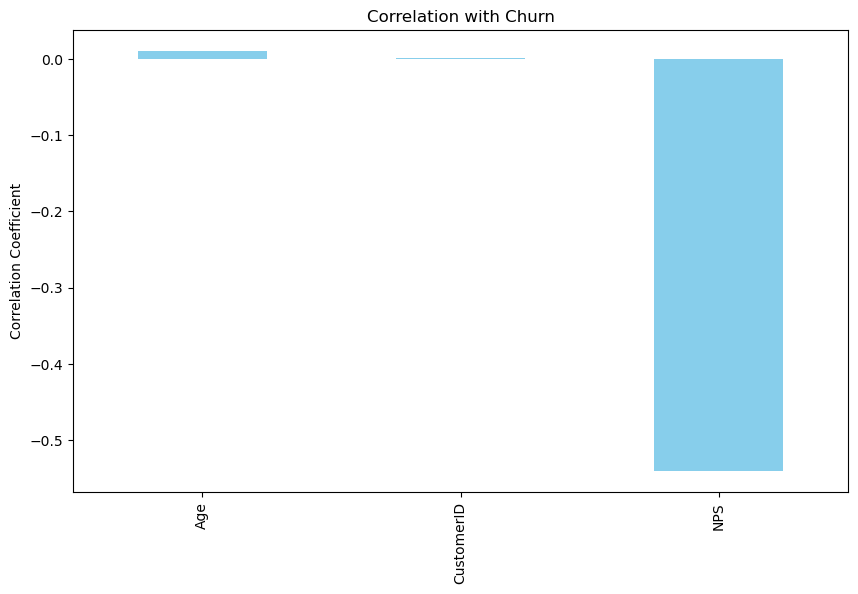

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [8]:
## Calculate correlation with ChurnLabel
correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

# plot the correlation
plt.figure(figsize= (10,6))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('Correlation with Churn')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation

Nested columns and see how they react

In [9]:
# List out all the nested columns
nested_colums = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

# Ensure that df exists and contains the nested columns
w1, w2 = 25, 1000
for col in nested_colums:  # Corrected spelling
    row = [col, df[col][0]]
    print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))



| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

###### Temporal Analysis:

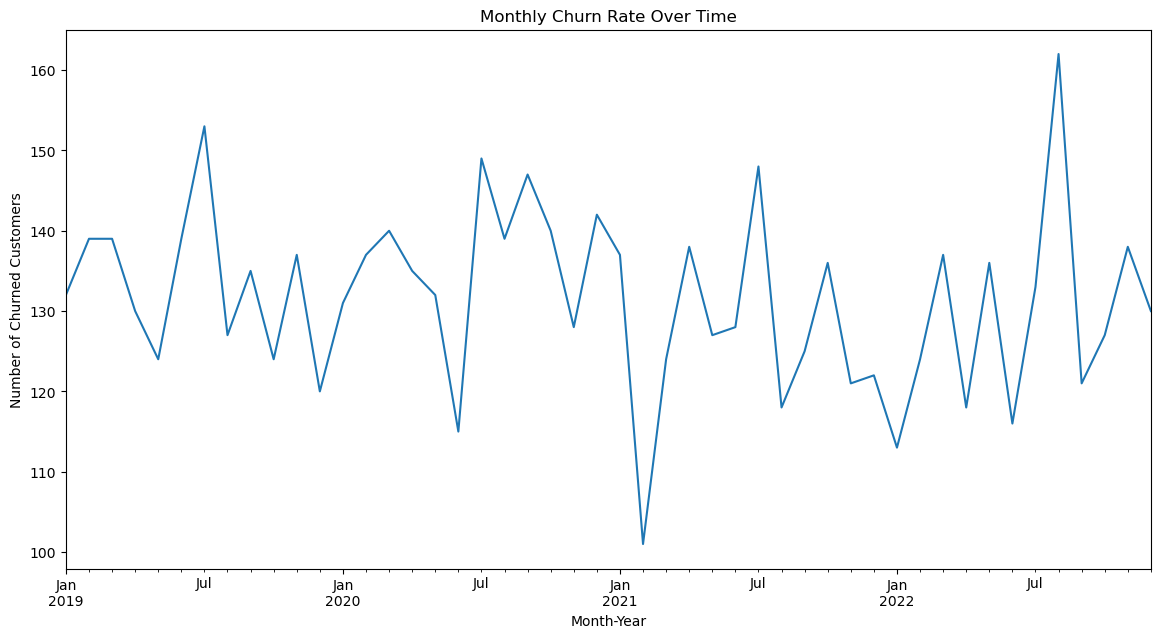

In [10]:
#Convert the Timestamp to datatime format so that it can be 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#Extract the month-year from the Timestamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

#Group by MonthYear and calculat the churn rates
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

#Plot the churn raete over time
plt.figure(figsize=(14,7))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate Over Time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()


##### Customer feedback "Rating and the ChurnLabel"

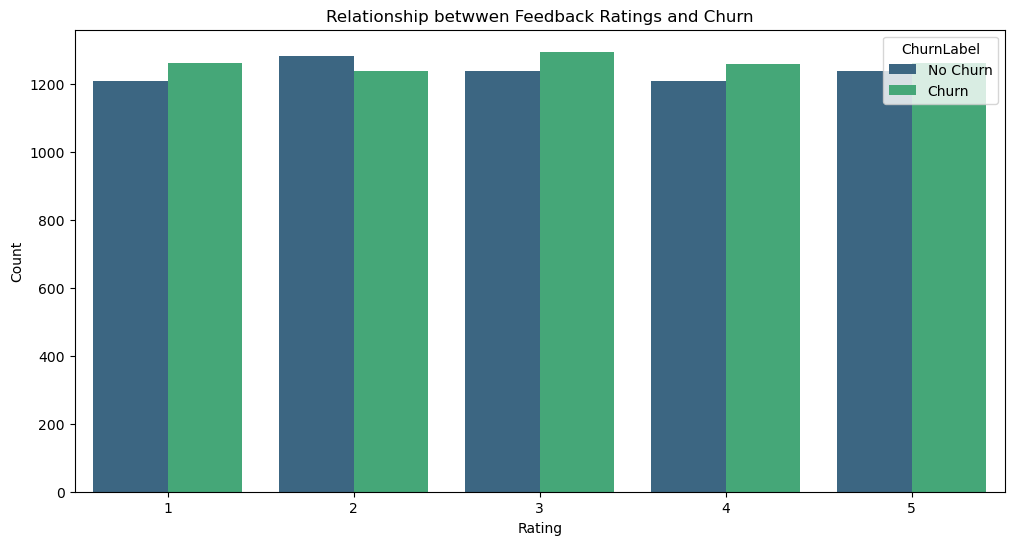

In [11]:
# Extracting rating from the feedback column and creating a new column for it
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

#Plotting the relationship between between 
plt.figure(figsize=(12, 6))
sns.countplot(x= 'FeedbackRating', data=df, hue='ChurnLabel', palette='viridis')
plt.title('Relationship betwwen Feedback Ratings and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

From the visual, there doesn't seem to be any indication that the "Feedback" rating affects the "ChurnLabel"

### Data Preprocessing and Feature Engineering

Here we will do:
- Create new feature that may have predictive power
- Convert categorical variables to numeric variables, using encoding technique
 scale or normalize numeric variables if necessary,
- Split the data into training and testing subsets,
- remove irrelevant features.
    

we begin by converting nested values from string formats to list/dictionaries using "literal_eval" function

In [12]:
# List nested column
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

# Apply the literal_eval function
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

More features will be extravted from the dataset.

In [13]:
# PurchaseHistory
df['PurchasedProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

# SubscriptionsDetails
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

# WebsiteUsage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# EngagementMetrics
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

# Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

# MarketingCommunication
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))

# Handling possible missing or null values during date calculations
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).days 
        for i in x if pd.notnull(i['Email_Clicked']) and pd.notnull(i['Email_Opened'])
    ])
)

df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) - pd.to_datetime(i['Email_Sent'])).days 
        for i in x if pd.notnull(i['Email_Opened']) and pd.notnull(i['Email_Sent'])
    ])
)


Special Extraction from three Columns:
  - Service Interactions
  - PaymentHistory
  - ClickstreamData

In [14]:
# Get all unique ServiceInteraction 'Types'
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []

# Extend the list and then make it unique after the loop
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)

# Now make the list unique by converting to a set and back to a list
unique_service_interaction_type = list(set(unique_service_interaction_type))

print('All unique Service Interaction Types:', unique_service_interaction_type)

# Get all unique PaymentHistory 'Method'
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []

for i in payment_history_methods:
    unique_payment_history_methods.extend(i)

# Now make the list unique by converting to a set and back to a list
unique_payment_history_methods = list(set(unique_payment_history_methods))

print('All unique Payment History Methods:', unique_payment_history_methods)

# Get all unique ClickstreamData 'Action'
clickstream_Data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_Data_actions = clickstream_Data_actions.to_list()
unique_clickstream_Data_actions = []

for i in clickstream_Data_actions:
    unique_clickstream_Data_actions.extend(i)

# Now make the list unique by converting to a set and back to a list
unique_clickstream_Data_actions = list(set(unique_clickstream_Data_actions))

print('All unique Clickstream Data Actions:', unique_clickstream_Data_actions)


All unique Service Interaction Types: ['Chat', 'Call', 'Email']
All unique Payment History Methods: ['Bank Transfer', 'PayPal', 'Credit Card']
All unique Clickstream Data Actions: ['Add to Cart', 'Click', 'Search']


From these three columns, we're going to be encoding more.

In [15]:
# Define unique values for ServiceInteractions and ClickstreamData

# Assuming 'ServiceInteractions' is a column containing lists of dictionaries with a 'Type' key
unique_service_interaction_type = set(
    interaction['Type'] for interactions in df['ServiceInteractions'] for interaction in interactions
)

# Assuming 'ClickstreamData' is a column containing lists of dictionaries with an 'Action' key
unique_clickstreams_data_actions = set(
    action['Action'] for actions in df['ClickstreamData'] for action in actions
)

# ServiceInteractions
for usit in unique_service_interaction_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(
        lambda x: len([i for i in x if i['Type'] == usit])
    )

# PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(
    lambda x: sum(i['Late_Payments'] for i in x)
)
df['PaymentHistoryNoAvgNoOfLatePayments'] = df['PaymentHistory'].apply(
    lambda x: np.mean([i['Late_Payments'] for i in x])
)

# ClickStreamData
for ucda in unique_clickstreams_data_actions:
    df[f'ClickstreamData_{ucda}'] = df['ClickstreamData'].apply(
        lambda x: len([i for i in x if i['Action'] == ucda])
    )


In [16]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Chat,ServiceInteractions_Call,ServiceInteractions_Email,PaymentHistoryNoOfLatePayments,PaymentHistoryNoAvgNoOfLatePayments,ClickstreamData_Add to Cart,ClickstreamData_Click,ClickstreamData_Search
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,2,1,1,40,13.333333,8,4,12
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,4,5,10,10,3.333333,8,9,7
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,2,3,7
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,24,17,18,79,26.333333,15,16,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,1,4,5,2,0.666667,17,9,4


See all the columns

In [17]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Chat',
       'ServiceInteractions_Call', 'ServiceInteractions_Email',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryNoAvgNoOfLatePayments',
       'ClickstreamData_

Pick out some columns next

In [18]:
df_ = df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayments',
    'ClickstreamData_Click',
    'ClickstreamData_Add to Cart',
    'ClickstreamData_Search',
    'SubscriptionDuration'
    

]]

df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,ClickstreamData_Click,ClickstreamData_Add to Cart,ClickstreamData_Search,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,...,319.0,818.0,1,1,2,40,4,8,12,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,...,88.0,110.0,5,10,4,10,9,8,7,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,...,117.0,333.0,1,1,1,8,3,2,7,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,...,423.0,159.0,17,18,24,79,16,15,16,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,...,96.0,193.0,4,5,1,2,9,17,4,580


Lets See the names of the columns

In [19]:
df_.loc[0]

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                       Express
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency              Weekly
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickstreamData_Click                        4
ClickstreamData_Add to Cart                  8
ClickstreamDa

Lets Check for Number of unique values 

In [20]:
print('Total dataset length:', len(df_))

df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total dataset length: 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

Enconding The String Parameters

In [21]:
# Gender encoding
gender_map = {'Male': 0, 'Female': 1}

# Apply the encoding map for Gender and replace NaN values with a specific encoding (e.g., 0)
df_['Gender'] = df_['Gender'].map(gender_map)

# Replace NaN values with a default value, e.g., 0 (or another value if preferred)
df_['Gender'] = df_['Gender'].fillna(0).astype(int)  # Converting to integer if needed

# SubscriptionPlan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# EngagementMetricsFrequency encoding
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

# Encode the SubscriptionPlan and EngagementMetricsFrequency columns
df_['SubscriptionPlan'] = df_['SubscriptionPlan'].map(subscription_plan_map)
df_['EngagementMetricsFrequency'] = df_['EngagementMetricsFrequency'].map(engagement_frequency_map)


In [22]:
df_.loc[0]

Age                                      31.00
Gender                                    0.00
NPS                                       3.00
ChurnLabel                                1.00
PurchaseFrequency                        38.00
PurchaseValue                          3994.72
SubscriptionPlan                          0.00
WebsitePageViews                         49.00
WebsiteTimeSpent                         15.00
EngagementMetricsLogins                  19.00
EngagementMetricsFrequency                0.00
FeedbackRating                            1.00
MarketingCommunicationNoOfEmails          8.00
MarketingCommunicationOpenClickDiff     319.00
MarketingCommunicationSentOpenDiff      818.00
ServiceInteractions_Call                  1.00
ServiceInteractions_Email                 1.00
ServiceInteractions_Chat                  2.00
PaymentHistoryNoOfLatePayments           40.00
ClickstreamData_Click                     4.00
ClickstreamData_Add to Cart               8.00
ClickstreamDa

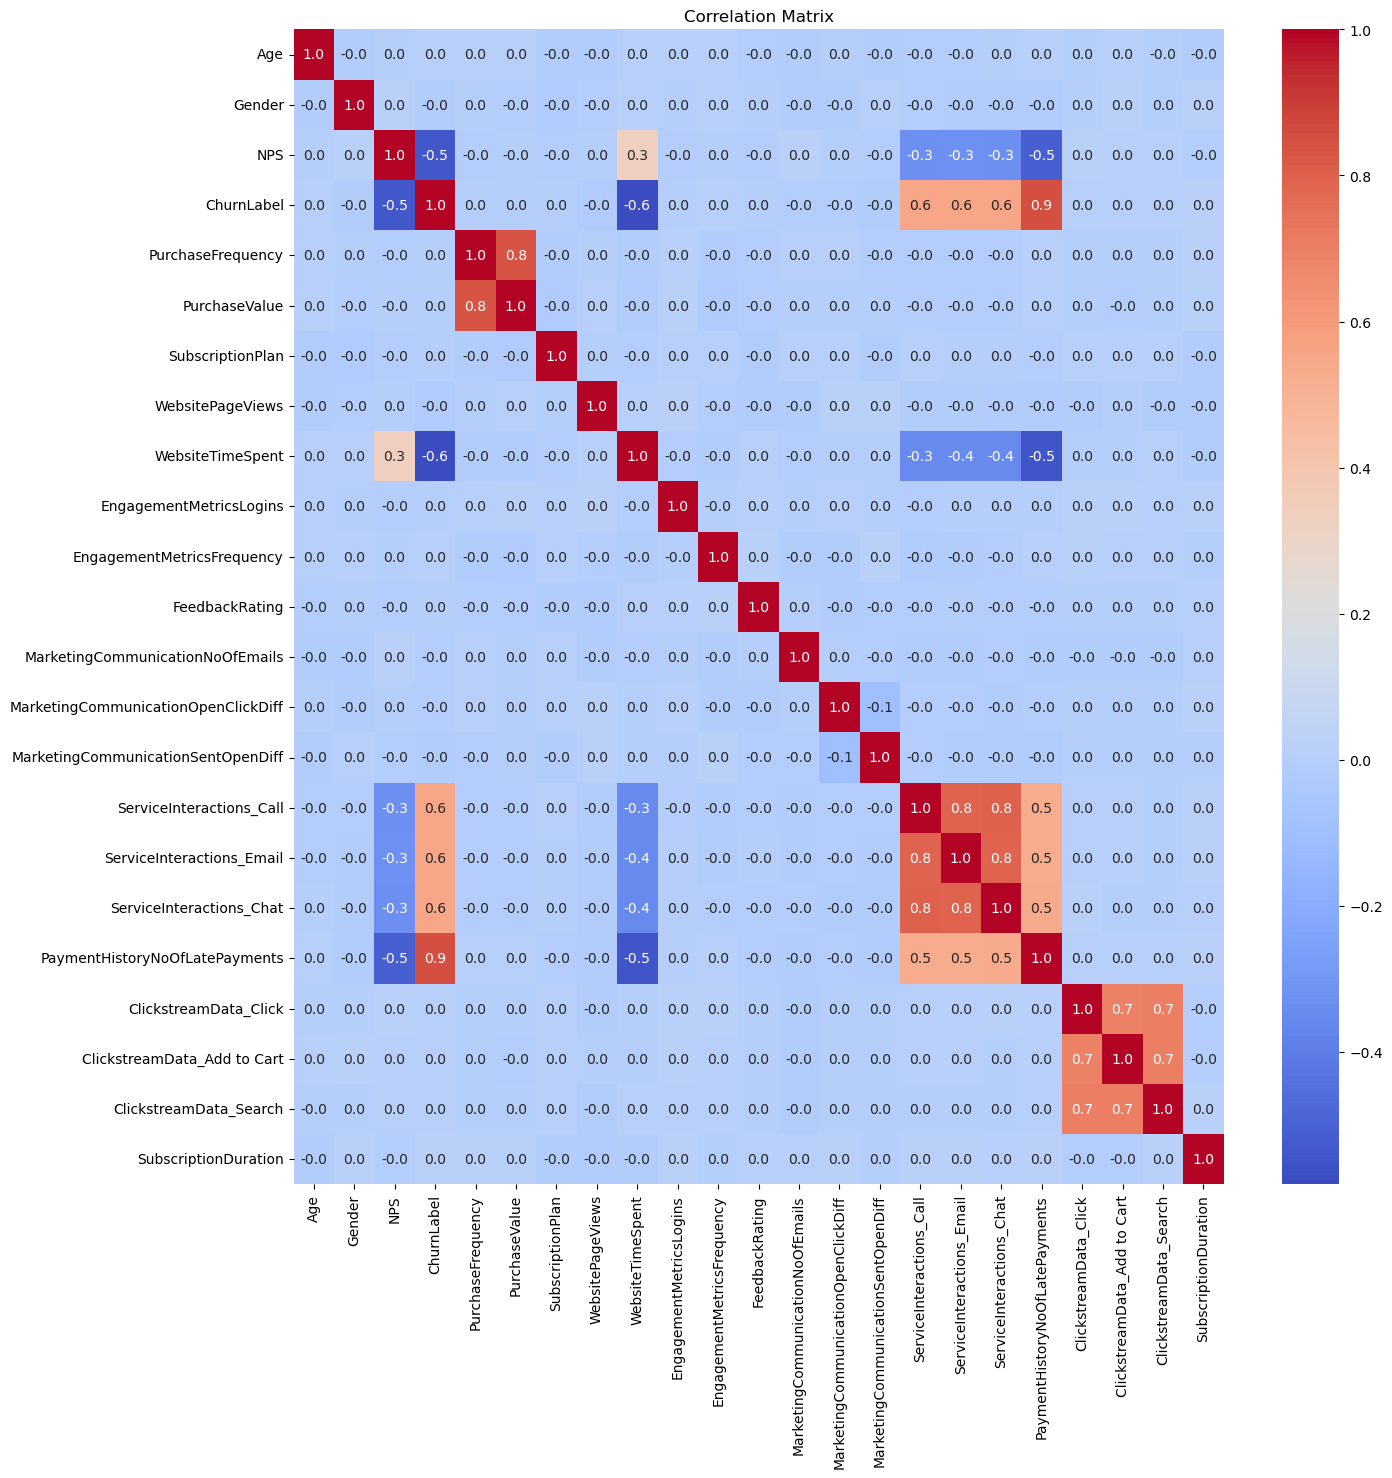

In [23]:
df_corr = df_.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 15))  
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

Split dta into train, test and validation sets

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define feature and target variables
X = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']

# First split: Training set (80%) and Other set (20%)
X_train, X_other, y_train, y_other = train_test_split(
    X, y, train_size=0.8, random_state=42
)

# Second split: Split the Other set into Test set (70% of the 20%) and Validation set (30% of the 20%)
X_test, X_val, y_test, y_val = train_test_split(
    X_other, y_other, test_size=0.3, random_state=42
)

# Print shapes to verify
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (9986, 22), Validation set: (750, 22), Test set: (1747, 22)


In [25]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

### Modelling 

Two different models for modelling:
- LogisticRegression
- DecisisonTreeClassifier


Metrics:

- Accuracy Score,
- Precision Score,
- Recall Score,
- F1 Score,

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(X, y, model, subset=''):
    y_pred = model.predict(X)
    
    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    # Print the evaluation metrics
    print(f'{subset} Accuracy Score: {accuracy:.4f}')
    print(f'{subset} Precision Score: {precision:.4f}')
    print(f'{subset} Recall Score: {recall:.4f}')
    print(f'{subset} F1 Score: {f1:.4f}')


### Modelling with Logistic Regression 

In [27]:
# Build the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model on train and the validation subsets
evaluate(X_train, y_train, lr, 'Train')
evaluate(X_val, y_val, lr, 'Validation')

Train Accuracy Score: 0.9710
Train Precision Score: 0.9767
Train Recall Score: 0.9659
Train F1 Score: 0.9713
Validation Accuracy Score: 0.9680
Validation Precision Score: 0.9644
Validation Recall Score: 0.9697
Validation F1 Score: 0.9670


### Modelling with Decision Trees

In [28]:
# Build the model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

#Evaluate on train and validation subsets
evaluate(X_train, y_train, dt, subset='Train')
evaluate(X_val, y_val, dt, subset='Validation')

Train Accuracy Score: 0.9769
Train Precision Score: 0.9775
Train Recall Score: 0.9770
Train F1 Score: 0.9773
Validation Accuracy Score: 0.9667
Validation Precision Score: 0.9617
Validation Recall Score: 0.9697
Validation F1 Score: 0.9657


### Evaluation on the Test Set

In [29]:
evaluate(X_test, y_test, lr, 'LogisticRegression Test')
evaluate(X_test, y_test, dt, 'DecisionTreeClassifier Test')

LogisticRegression Test Accuracy Score: 0.9691
LogisticRegression Test Precision Score: 0.9734
LogisticRegression Test Recall Score: 0.9644
LogisticRegression Test F1 Score: 0.9689
DecisionTreeClassifier Test Accuracy Score: 0.9731
DecisionTreeClassifier Test Precision Score: 0.9736
DecisionTreeClassifier Test Recall Score: 0.9725
DecisionTreeClassifier Test F1 Score: 0.9730


<function matplotlib.pyplot.show(close=None, block=None)>

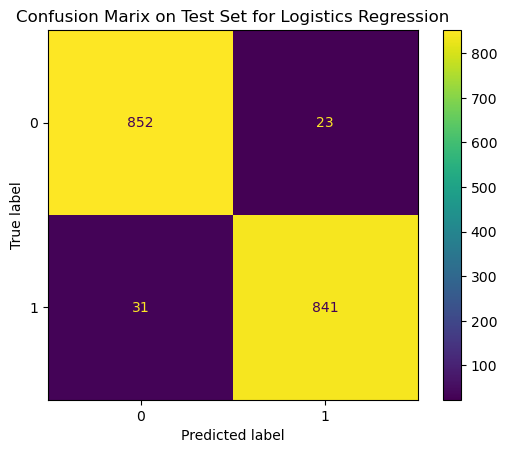

In [30]:
# Predictions for Logistic Regression on test set
lr_y_pred = lr.predict(X_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Marix on Test Set for Logistics Regression')
plt.show





<function matplotlib.pyplot.show(close=None, block=None)>

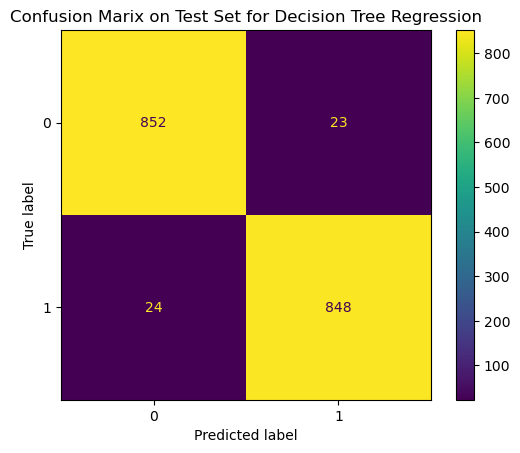

In [31]:
# Predictions for Logistic Regression on test set
dt_y_pred = dt.predict(X_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Marix on Test Set for Decision Tree Regression')
plt.show

## Conclusion 

The Most Important features:
- The number of service interactions the customer has had through call, Email, and Chat
- The number of times the customer has made late payments,
- The time spent on the company's website, 
- The Net Promoter Score (NPS)